In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing

In [3]:
df = pd.read_csv('papers.csv')
df = df.iloc[:5000,:]

In [4]:
df.head(10)

,id,year,title,event_type,pdf_name,abstract,paper_text
0,1,1987,Self-Organization of Associative Database and ...,NaN,1-self-organization-of-associative-database-an...,Abstract Missing,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...
1,10,1987,A Mean Field Theory of Layer IV of Visual Cort...,NaN,10-a-mean-field-theory-of-layer-iv-of-visual-c...,Abstract Missing,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...
2,100,1988,Storing Covariance by the Associative Long-Ter...,NaN,100-storing-covariance-by-the-associative-long...,Abstract Missing,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...
3,1000,1994,Bayesian Query Construction for Neural Network...,NaN,1000-bayesian-query-construction-for-neural-ne...,Abstract Missing,Bayesian Query Construction for Neural\nNetwor...
4,1001,1994,"Neural Network Ensembles, Cross Validation, an...",NaN,1001-neural-network-ensembles-cross-validation...,Abstract Missing,"Neural Network Ensembles, Cross\nValidation, a..."
5,1002,1994,Using a neural net to instantiate a deformable...,NaN,1002-using-a-neural-net-to-instantiate-a-defor...,Abstract Missing,U sing a neural net to instantiate a\ndeformab...
6,1003,1994,Plasticity-Mediated Competitive Learning,NaN,1003-plasticity-mediated-competitive-learning.pdf,Abstract Missing,Plasticity-Mediated Competitive Learning\n\nTe...
7,1004,1994,ICEG Morphology Classification using an Analog...,NaN,1004-iceg-morphology-classification-using-an-a...,Abstract Missing,ICEG Morphology Classification using an\nAnalo...
8,1005,1994,Real-Time Control of a Tokamak Plasma Using Ne...,NaN,1005-real-time-control-of-a-tokamak-plasma-usi...,Abstract Missing,Real-Time Control of a Tokamak Plasma\nUsing N...
9,1006,1994,Pulsestream Synapses with Non-Volatile Analogu...,NaN,1006-pulsestream-synapses-with-non-volatile-an...,Abstract Missing,Real-Time Control of a Tokamak Plasma\nUsing N...


In [5]:
df.shape

(5000, 7)

In [6]:
df.isnull().sum()

id               0
year             0
title            0
event_type    4335
pdf_name         0
abstract         0
paper_text       0
dtype: int64

# Preprocessing Data

# Working With "paper text"

In [7]:
df['paper_text'][0]

'767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABASE\nAND ITS APPLICATIONS\nHisashi Suzuki and Suguru Arimoto\nOsaka University, Toyonaka, Osaka 560, Japan\nABSTRACT\nAn efficient method of self-organizing associative databases is proposed together with\napplications to robot eyesight systems. The proposed databases can associate any input\nwith some output. In the first half part of discussion, an algorithm of self-organization is\nproposed. From an aspect of hardware, it produces a new style of neural network. In the\nlatter half part, an applicability to handwritten letter recognition and that to an autonomous\nmobile robot system are demonstrated.\n\nINTRODUCTION\nLet a mapping f : X -+ Y be given. Here, X is a finite or infinite set, and Y is another\nfinite or infinite set. A learning machine observes any set of pairs (x, y) sampled randomly\nfrom X x Y. (X x Y means the Cartesian product of X and Y.) And, it computes some\nestimate j : X -+ Y of f to make small, the estimation erro

# Steps to do
1 Lower case                                    
2 remove HTML tags                                     
3 remove special characters and digits                               
4 Convert to list from string                                      
5 remove stopwords                              
6 remove words less than three letters                             
7 lemmatize


In [8]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer

In [10]:
stop_words = set(stopwords.words('english'))
new_stop_words = ["fig","figure","image","sample","using", 
             "show", "result", "large", 
             "also", "one", "two", "three", 
             "four", "five", "seven","eight","nine"]

In [11]:
stop_words = list(stop_words.union(new_stop_words))

In [13]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer

def preprocess_text(txt):
    # Lower case
    txt = txt.lower()
    # Remove HTML tags
    txt = re.sub(r"<.*?>", " ", txt)
    # Remove special characters and digits
    txt = re.sub(r"[^a-zA-Z]", " ", txt)
    # tokenization
    txt = nltk.word_tokenize(txt)
    # Remove stopwords
    txt = [word for word in txt if word not in stop_words]
    # Remove words less than three letters
    txt = [word for word in txt if len(word) >= 3]
    # Lemmatize
    lmtr = WordNetLemmatizer()
    txt = [lmtr.lemmatize(word) for word in txt]

    return " ".join(txt)


In [14]:
preprocess_text("HELO word loving moving the to from 99999 *&^ <p>This is a <b>sample</b> text with <i>HTML tags</i>.</p>")

'helo word loving moving text html tag'

In [15]:
docs = df['paper_text'].apply(lambda x:preprocess_text(x))

In [16]:
docs

0       self organization associative database applica...
1       mean field theory layer visual cortex applicat...
2       storing covariance associative long term poten...
3       bayesian query construction neural network mod...
4       neural network ensemble cross validation activ...
                              ...                        
4995    low rank time frequency synthesis matthieu kow...
4996    state space model decoding auditory attentiona...
4997    efficient structured matrix rank minimization ...
4998    cient minimax signal detection graph jing qian...
4999    signal aggregate constraint additive factorial...
Name: paper_text, Length: 5000, dtype: object

# Using TF-IDF
TF-IDF stands for Text Frequency Inverse Document Frequency. The importance of each word increases in proportion to the number of times a word appears in the document (Text Frequency – TF) but is offset by the frequency of the word in the corpus (Inverse Document Frequency – IDF).

Using the tf-idf weighting scheme, the keywords are the words with the highest TF-IDF score. 

# CountVectorizer
For this task, I’ll first use the CountVectorizer method in Scikit-learn to create a vocabulary and generate the word count:

In [17]:
from sklearn.feature_extraction.text import CountVectorizer

# Reduce max_features and adjust n-gram range
cv = CountVectorizer(max_features=6000, ngram_range=(1, 2))

# Create a vocabulary and word count vectors
word_count_vectors = cv.fit_transform(docs)


In [18]:
cv

CountVectorizer(max_features=6000, ngram_range=(1, 2))

# TfidfTransformer 

In [19]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(word_count_vectors)

TfidfTransformer()

# I will create a function for the task of Keyword Extraction with Python by using the Tf-IDF vectorization:m

In [20]:
def sort_coo(coo_matrix):
    tuples = zip(coo_matrix.col, coo_matrix.data)
    return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)

def extract_topn_from_vector(feature_names, sorted_items, topn=10):
    #taking top items from vector
    sorted_items = sorted_items[:topn]
    
    score_vals = []
    feature_vals = []
    for idx, score in sorted_items:
        fname = feature_names[idx]
        score_vals.append(round(score,3))
        feature_vals.append(feature_names[idx])
    
    #create a tuples of features,score
    results = {}
    for idx in range(len(feature_vals)):
        results[feature_vals[idx]] = score_vals[idx]  # Fix: Changed '==' to '='
    return results


# get feature names
feature_names=cv.get_feature_names_out()

def get_keywords(idx, docs):

    #generate tf-idf for the given document
    tf_idf_vector=tfidf_transformer.transform(cv.transform([docs[idx]]))

    #sort the tf-idf vectors by descending order of scores
    sorted_items=sort_coo(tf_idf_vector.tocoo())

    #extract only the top n; n here is 10
    keywords=extract_topn_from_vector(feature_names,sorted_items,10)
    
    return keywords


def print_results(idx,keywords, df):
    # now print the results
    print("\n=====Title=====")
    print(df['title'][idx])
    print("\n=====Abstract=====")
    print(df['abstract'][idx])
    print("\n===Keywords===")
    for k in keywords:
        print(k,keywords[k])
idx=941
keywords=get_keywords(idx, docs)
print_results(idx,keywords, df)


=====Title=====
Algorithms for Non-negative Matrix Factorization

=====Abstract=====
Non-negative matrix factorization (NMF) has previously been shown to 
be a useful decomposition for multivariate data. Two different multi- 
plicative algorithms for NMF are analyzed. They differ only slightly in 
the multiplicative factor used in the update rules. One algorithm can be 
shown to minimize the conventional least squares error while the other 
minimizes the generalized Kullback-Leibler divergence. The monotonic 
convergence of both algorithms can be proven using an auxiliary func- 
tion analogous to that used for proving convergence of the Expectation- 
Maximization algorithm. The algorithms can also be interpreted as diag- 
onally rescaled gradient descent, where the rescaling factor is optimally 
chosen to ensure convergence. 

===Keywords===
update rule 0.365
update 0.317
auxiliary 0.238
rule 0.205
nmf 0.196
multiplicative 0.194
matrix factorization 0.182
matrix 0.176
factorization 0.

# Pickle necessary files

In [21]:
import pickle
pickle.dump(tfidf_transformer,open('tfidf_transformer.pkl','wb'))
pickle.dump(cv,open('count_vectorizer.pkl','wb'))
pickle.dump(feature_names,open('feature_names.pkl','wb'))

In [22]:
df['paper_text'][0]

'767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABASE\nAND ITS APPLICATIONS\nHisashi Suzuki and Suguru Arimoto\nOsaka University, Toyonaka, Osaka 560, Japan\nABSTRACT\nAn efficient method of self-organizing associative databases is proposed together with\napplications to robot eyesight systems. The proposed databases can associate any input\nwith some output. In the first half part of discussion, an algorithm of self-organization is\nproposed. From an aspect of hardware, it produces a new style of neural network. In the\nlatter half part, an applicability to handwritten letter recognition and that to an autonomous\nmobile robot system are demonstrated.\n\nINTRODUCTION\nLet a mapping f : X -+ Y be given. Here, X is a finite or infinite set, and Y is another\nfinite or infinite set. A learning machine observes any set of pairs (x, y) sampled randomly\nfrom X x Y. (X x Y means the Cartesian product of X and Y.) And, it computes some\nestimate j : X -+ Y of f to make small, the estimation erro

In [23]:
docs[0]

'self organization associative database application hisashi suzuki suguru arimoto osaka university toyonaka osaka japan abstract efficient method self organizing associative database proposed together application robot eyesight system proposed database associate input output first half part discussion algorithm self organization proposed aspect hardware produce new style neural network latter half part applicability handwritten letter recognition autonomous mobile robot system demonstrated introduction let mapping given finite infinite set another finite infinite set learning machine observes set pair sampled randomly mean cartesian product computes estimate make small estimation error measure usually say faster decrease estimation error increase number sample better learning machine however expression performance incomplete since lack consideration candidate assumed preliminarily find good learning machine clarify conception let discus type learning machine let advance understanding s

In [24]:
docs[3]

'bayesian query construction neural network model gerhard paass jorg kindermann german national research center computer science gmd sankt augustin germany paass gmd kindermann gmd abstract data collection costly much gained actively selecting particularly informative data point sequential way bayesian decision theoretic framework develop query selection criterion explicitly take account intended use model prediction markov chain monte carlo method necessary quantity approximated desired precision number data point grows model complexity modified bayesian model selection strategy property version criterion ate demonstrated numerical experiment introduction paper consider situation data collection costly example real measurement technical experiment performed situation approach query learning active data selection sequential experimental design etc potential benefit depending previously seen example new input value query selected systematic way corresponding output obtained motivation q

In [30]:
# Example: Using a genetic algorithm for sentence selection
# (Note: This is a simplified example and might need further refinement)

from geneticalgorithm import geneticalgorithm as ga

def fitness_function(selected_indices):
    selected_sentences = [sentences[i] for i in selected_indices]
    # Your custom scoring or similarity metric here
    return custom_score(selected_sentences)

algorithm_param = {'max_num_iteration': 100, 'population_size': 10, 'mutation_probability': 0.1}
model = ga(function=fitness_function, dimension=len(sentences), variable_type='int', variable_boundaries=(0, len(sentences) - 1), algorithm_parameters=algorithm_param)
model.run()
selected_indices = model.output_dict['variable']
selected_sentences = [sentences[i] for i in selected_indices]
summary = '. '.join(selected_sentences)


In [35]:
from gensim.summarization import textrank

textrank.summarize(text, ratio=0.2)

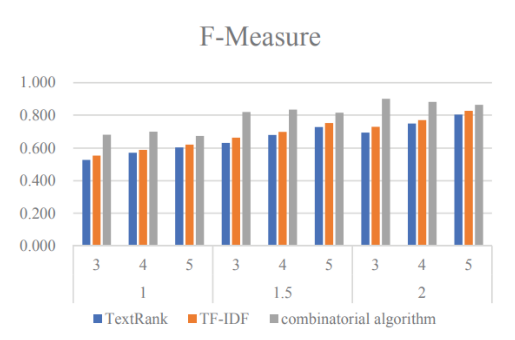

In [39]:
algorithms = ['TextRank', 'TF-IDF', 'Combinatorial']
scores = [textrank_score, tfidf_score, combinatorial_score]

plotfmeasure([textrank_score, tfidf_score, combinatorial_score],[3,4,5],[1,1.5,2])z`